In [2]:
#imports
import numpy as np
import pandas as pd
import lasio 
from las_py import Laspy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestCentroid
from yellowbrick.cluster import KElbowVisualizer

In [4]:
las = lasio.read("./data/100163203803W400.las")
mnemonic = las.keys()
print(mnemonic)

FileNotFoundError: [Errno 2] No such file or directory: './data/100163203803W400.las'

In [ ]:
data = np.loadtxt('./data/100163203803W400.las', skiprows=52)

data = pd.DataFrame(data, columns=mnemonic)
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=mnemonic)

#data_scaled.head(10)
data.head(10)

,DEPTH,GR,NPHI,PE,RHOB,AC
0,770.80,68.87,0.430,0.99,1.916,384.91
1,770.84,68.38,0.399,1.00,2.041,376.11
2,770.88,65.32,0.358,1.16,2.192,366.95
3,770.92,65.47,0.333,1.50,2.323,358.01
4,770.96,66.36,0.313,1.92,2.367,349.87
5,771.00,65.03,0.298,2.13,2.359,342.99
6,771.04,66.45,0.293,2.20,2.338,337.69
7,771.08,68.83,0.298,2.33,2.314,334.15
8,771.12,67.63,0.295,2.38,2.310,332.33
9,771.16,67.57,0.296,2.29,2.321,331.98


In [ ]:
#x = data_scaled.iloc[:,1:6]
x = data.iloc[:,1:6]
x.drop('NPHI', inplace=True, axis=1)
x.head(10)

/var/folders/4q/2_vnm84j6hl9mgc_6srxd8_40000gn/T/ipykernel_15807/2682947438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('NPHI', inplace=True, axis=1)


,GR,PE,RHOB,AC
0,68.87,0.99,1.916,384.91
1,68.38,1.00,2.041,376.11
2,65.32,1.16,2.192,366.95
3,65.47,1.50,2.323,358.01
4,66.36,1.92,2.367,349.87
5,65.03,2.13,2.359,342.99
6,66.45,2.20,2.338,337.69
7,68.83,2.33,2.314,334.15
8,67.63,2.38,2.310,332.33
9,67.57,2.29,2.321,331.98


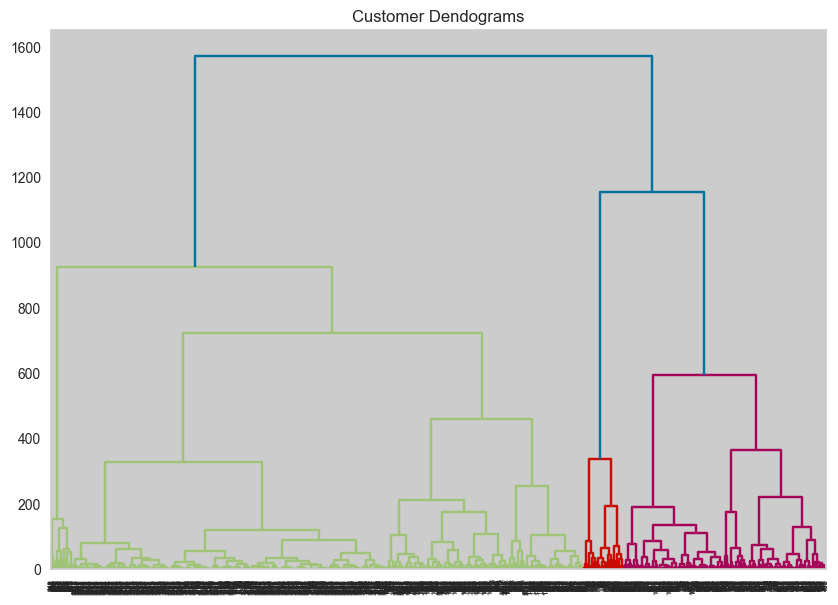

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dendrogram = shc.dendrogram(shc.linkage(x, method='ward'))

plt.show()

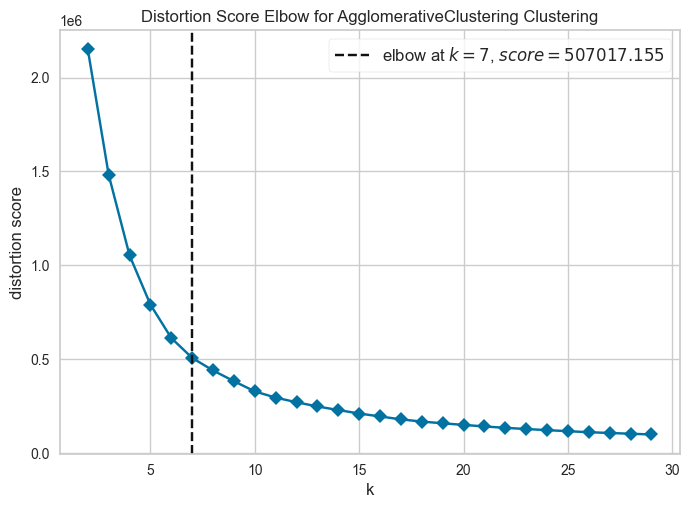

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
agglo = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(agglo, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(x)
# Finalize and render figure
visualizer.show()

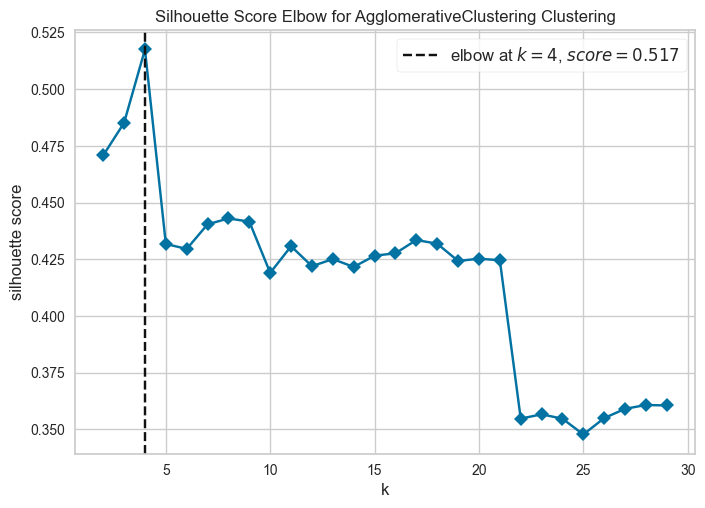

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
agglo = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(agglo, k=(2,30), metric='silhouette', timings=False)
# Fit data to visualizer
visualizer.fit(x)
# Finalize and render figure
visualizer.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


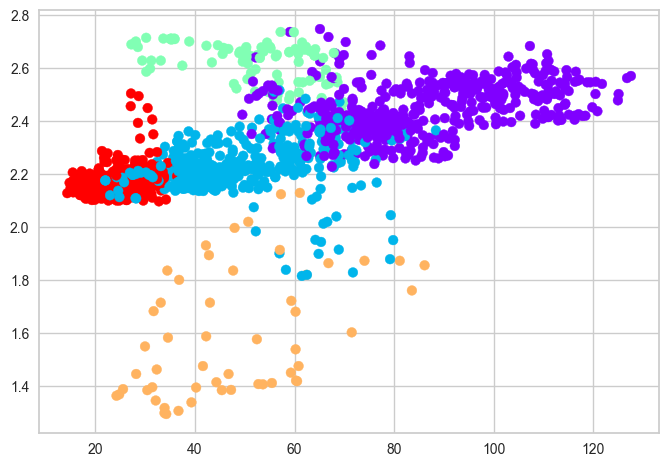

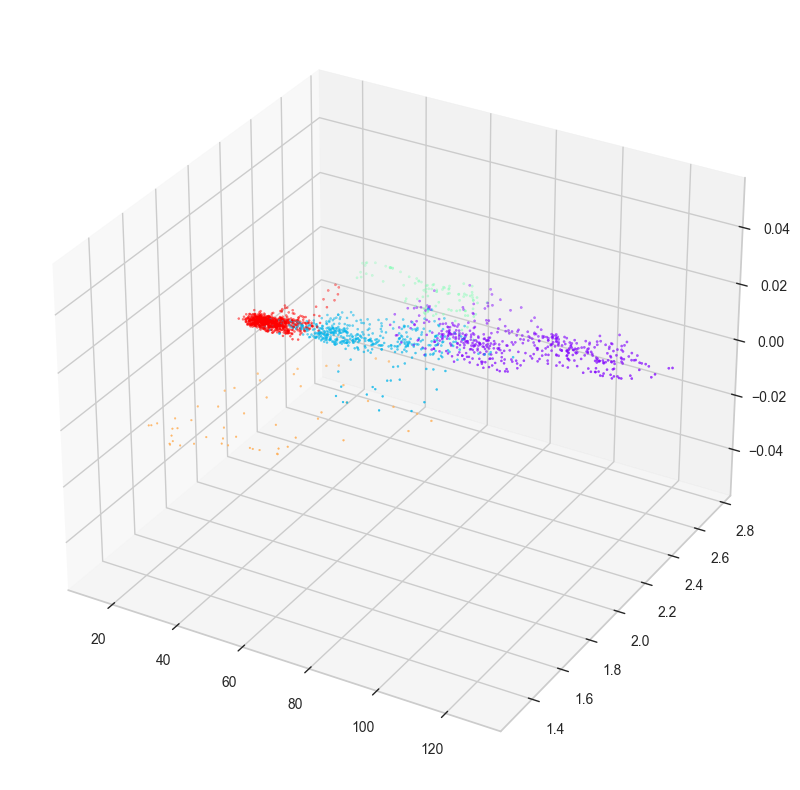

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_model = model.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = y_model
plt.scatter(data_with_clusters['GR'],data_with_clusters['RHOB'],c=data_with_clusters['Clusters'],cmap='rainbow')
fig = plt.figure(figsize=(100,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(data_with_clusters['GR'],data_with_clusters['RHOB'],data_with_clusters['RHOB'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
clf = NearestCentroid()
clf.fit(x, y_model)
output = pd.DataFrame(clf.centroids_, columns=['GR', 'PE', 'RHOB', 'AC'])
output = np.round_(output, decimals=1)
output['Lithology'] = None
output.head(10)

,GR,PE,RHOB,AC,Lithology
0,86.0,2.8,2.5,319.0,None
1,48.2,2.0,2.2,343.0,None
2,52.4,4.0,2.6,233.9,None
3,47.6,1.8,1.6,422.9,None
4,23.1,1.7,2.2,325.5,None


In [ ]:
for i in range(0, 5):
    if (output.at[i, 'GR'] < 45 and 2.0 <= output.at[i, 'RHOB'] <= 2.4):
        output.at[i, 'Lithology'] = 'Sandstone'
    elif (output.at[i, 'GR'] < 80 and output.at[i, 'RHOB'] < 2.0):
        output.at[i, 'Lithology'] = 'Coal'
    elif (output.at[i, 'GR'] < 80 and output.at[i, 'RHOB'] > 2.45):
        output.at[i, 'Lithology'] = 'Limestone'
    elif (45 <= output.at[i, 'GR'] <= 80  and 2.0 <= output.at[i, 'RHOB'] <= 2.4):
        output.at[i, 'Lithology'] = 'Siltstone'
    elif (output.at[i, 'GR'] >  80):
        output.at[i, 'Lithology'] = 'Shale'
print('The following are the cluster centers for each cluster and their interpreted Lithology:')
output.head(10)

NameError: name 'output' is not defined

In [ ]:
labels = pd.DataFrame(model.labels_, columns=['Lithology'])
#labels.loc[labels['Lithology'] == 3] = 7
#labels.loc[labels['Lithology'] == 2] = 8
#labels.loc[labels['Lithology'] == 4] = 3
#labels.loc[labels['Lithology'] == 0] = 6
#labels.loc[labels['Lithology'] == 1] = 4
data['Lithology'] = labels
#data.to_csv("hierarchical_ward.csv")
data.head(10)

,DEPTH,GR,NPHI,PE,RHOB,AC,Lithology
0,770.80,68.87,0.430,0.99,1.916,384.91,1
1,770.84,68.38,0.399,1.00,2.041,376.11,1
2,770.88,65.32,0.358,1.16,2.192,366.95,1
3,770.92,65.47,0.333,1.50,2.323,358.01,1
4,770.96,66.36,0.313,1.92,2.367,349.87,1
5,771.00,65.03,0.298,2.13,2.359,342.99,1
6,771.04,66.45,0.293,2.20,2.338,337.69,1
7,771.08,68.83,0.298,2.33,2.314,334.15,1
8,771.12,67.63,0.295,2.38,2.310,332.33,1
9,771.16,67.57,0.296,2.29,2.321,331.98,1


In [ ]:
lithology_colors  =   {4:    '#CABAAE', #brown/grey 
                        6:    '#ebe9e6', #grey
                        8:    '#00ff00', #lime green
                        7: '#000000', #black
                        3:    '#FFFF00', #yellow
                      }

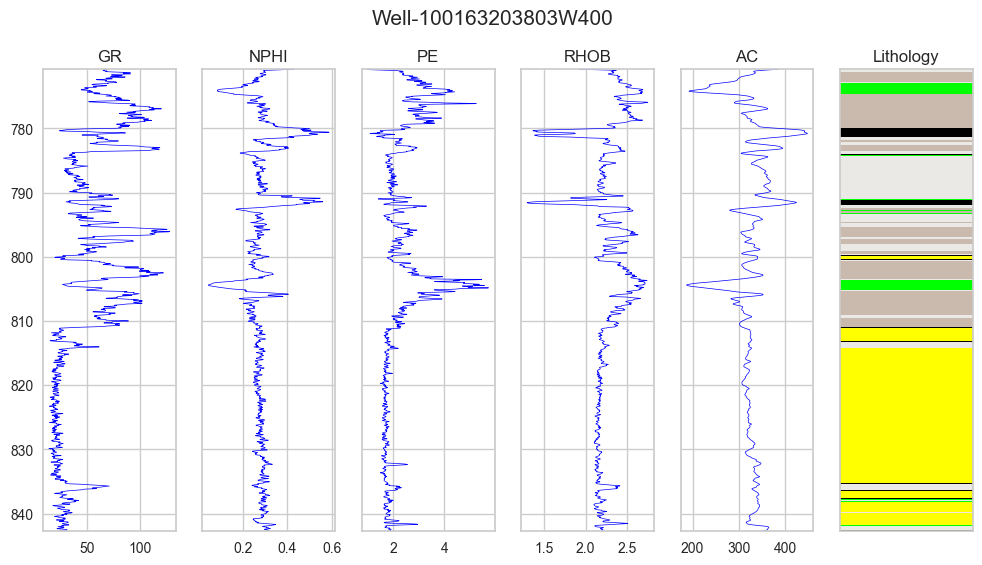

In [ ]:
logs = data.columns[1:]
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)
 

colors = lithology_colors.values()
cmap = ListedColormap(colors)
plt.suptitle('Well-100163203803W400', size=15)
for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[logs[i]], data.DEPTH, color='blue', lw=0.5)
        ax[i].set_title('%s' % logs[i])
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
    if i == cols-1:
        F = np.vstack((model.labels_,model.labels_)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)], cmap = cmap)
        ax[i].axes.get_xaxis().set_visible(False)
        ax[i].axes.get_yaxis().set_visible(False)
        ax[i].set_title('Lithology')